## Finding Donors for Charity
### Method: Supervised Learning

### Exploring the Data

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import visuals as vs


%matplotlib inline

data = pd.read_csv("census.csv")

display(data.head(n=5))
display(data.tail(n=5))

print data.shape

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


(45222, 14)


### Implementation: Data Exploration
 

In [2]:
income_breakdown= data["income"].value_counts()

n_records = data.shape[0]

n_greater_50k = data[(data.income== '>50K')].shape[0]

n_at_most_50k = data[(data.income== '<=50K')].shape[0]

greater_percent = float(n_greater_50k)/float(data.shape[0])*100

print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)
print income_breakdown

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%
<=50K    34014
>50K     11208
Name: income, dtype: int64


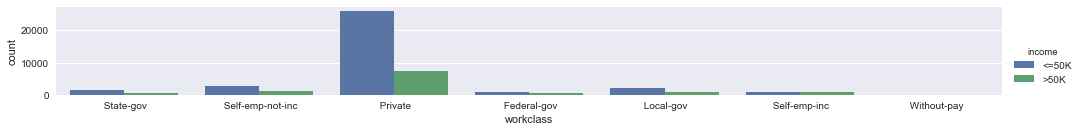

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.factorplot(x="workclass", data=data, 
               hue='income', kind="count", size=2, aspect=7)

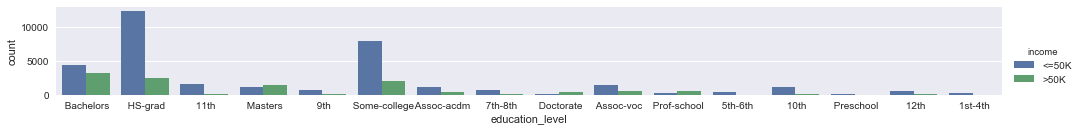

In [4]:
sns.factorplot(x="education_level", data=data, 
               hue='income', kind="count", size=2, aspect=7)


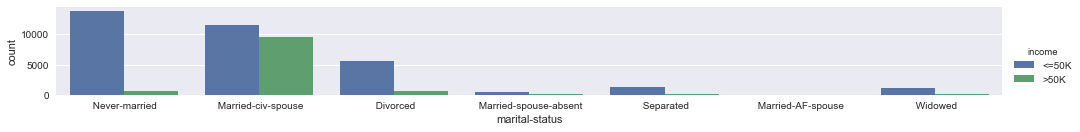

In [5]:
sns.factorplot(x="marital-status", data=data, 
               hue='income', kind="count", size=2, aspect=7)

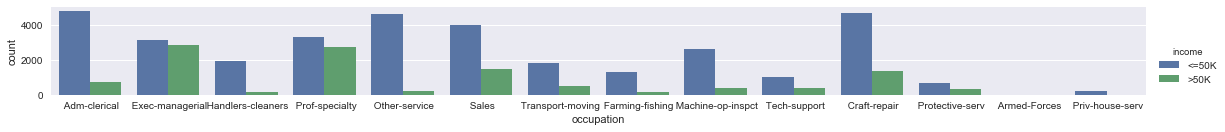

In [6]:
sns.factorplot(x="occupation", data=data, 
               hue='income', kind="count", size=2, aspect=8)


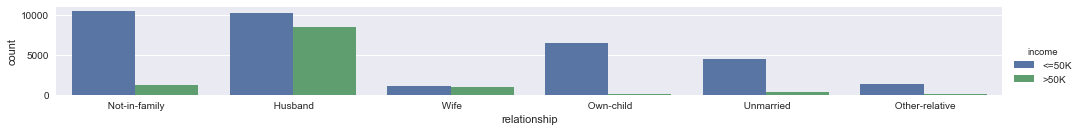

In [7]:
sns.factorplot(x="relationship", data=data, 
               hue='income', kind="count", size=2, aspect=7)


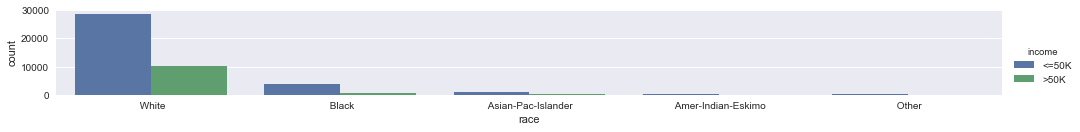

In [8]:
sns.factorplot(x="race", data=data, 
               hue='income', kind="count", size=2, aspect=7)


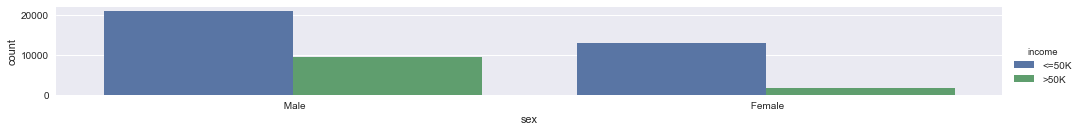

In [9]:
sns.factorplot(x="sex", data=data, 
               hue='income', kind="count", size=2, aspect=7)


In [10]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


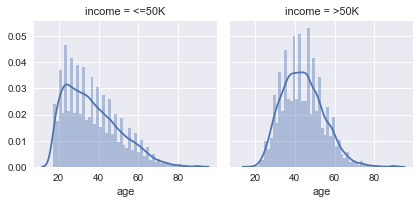

In [11]:
g = sns.FacetGrid(data, col="income") 
g.map(sns.distplot, "age")


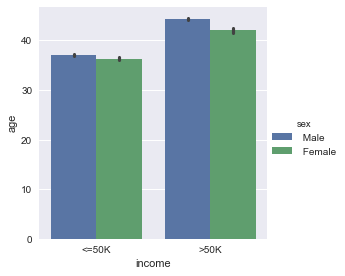

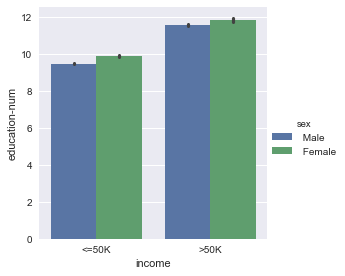

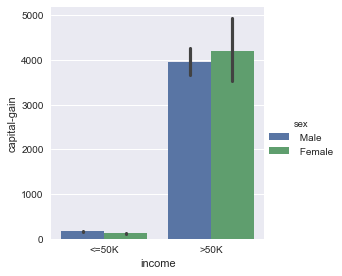

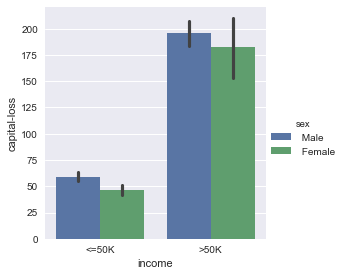

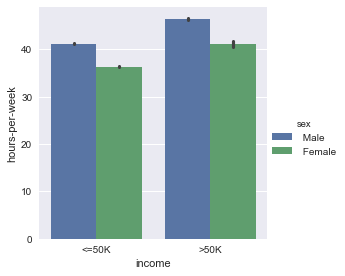

In [12]:
import seaborn as sns
sns.factorplot('income', 'age', hue='sex', data=data, kind='bar')
sns.factorplot('income', 'education-num', hue='sex', data=data, kind='bar')
sns.factorplot('income', 'capital-gain', hue='sex', data=data, kind='bar')
sns.factorplot('income', 'capital-loss', hue='sex', data=data, kind='bar')
sns.factorplot('income', 'hours-per-week', hue='sex', data=data, kind='bar')

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparing the Data
 

### Transforming Skewed Continuous Feature


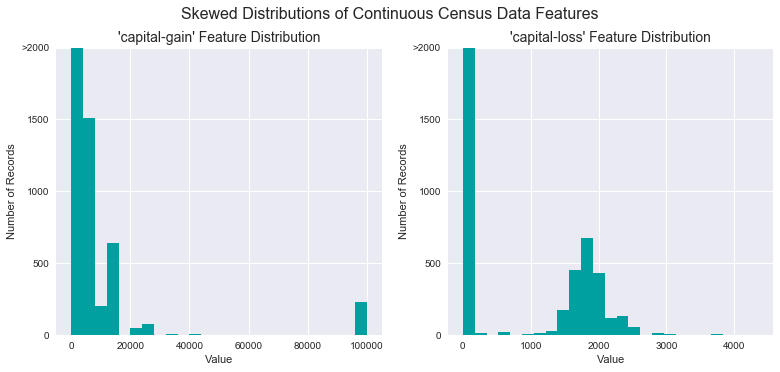

In [14]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

vs.distribution(data)

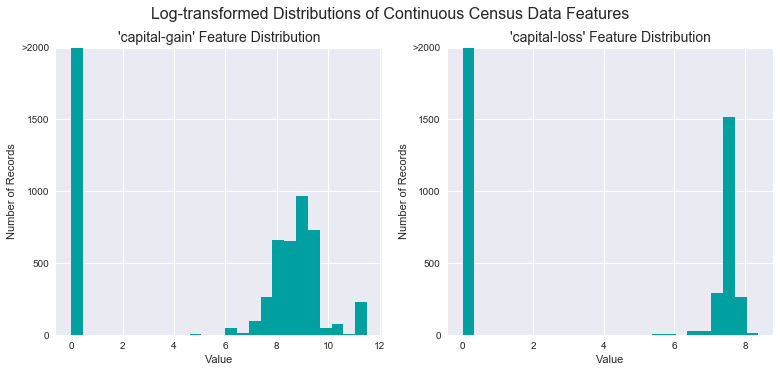

In [15]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

In [17]:
features_final = pd.get_dummies(features_log_minmax_transform)

income = income_raw.apply( lambda income: 1 if income == '>50K' else 0)

encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data

In [18]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


C:\Users\tarkan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance

### Metrics and the Naive Predictor

Note:

For this problem I have used f-beta score to evaluate a particular model's performace. It sounds for this problem "accuracy" is more important than "recall", therefor more emphasis is put on accuracy.(beta = 0.5)

A model that always predicts an individual to make more than $50,000 is generated as a naive predictor or benchmark. The purpose of this is to simply show what a base model without any intelligence would look like.

In [20]:
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
 
print TP
print FP
print TN
print FN


accuracy = float((TP+TN)) / float((TP+TN+FP+FN))
recall = float(TP )/ float((TP+FN))
precision = float(TP) /float((TP+FP))

beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

11208
34014
0
0
Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Implementation - Creating a Training and Predicting Pipeline

In [21]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    
    results['train_time'] = end - start
        
    
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    
    results['pred_time'] = end - start
            
        
    results['acc_train'] = accuracy_score (y_train[:300], predictions_train)
        
    
    results['acc_test'] = accuracy_score (y_test, predictions_test)
    
    
    results['f_train'] = fbeta_score (y_train[:300], predictions_train, beta=0.5)
        
    
    results['f_test'] = fbeta_score (y_test, predictions_test, beta=0.5)
       
    
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

### Implementation: Initial Model Evaluation

C:\Users\tarkan\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


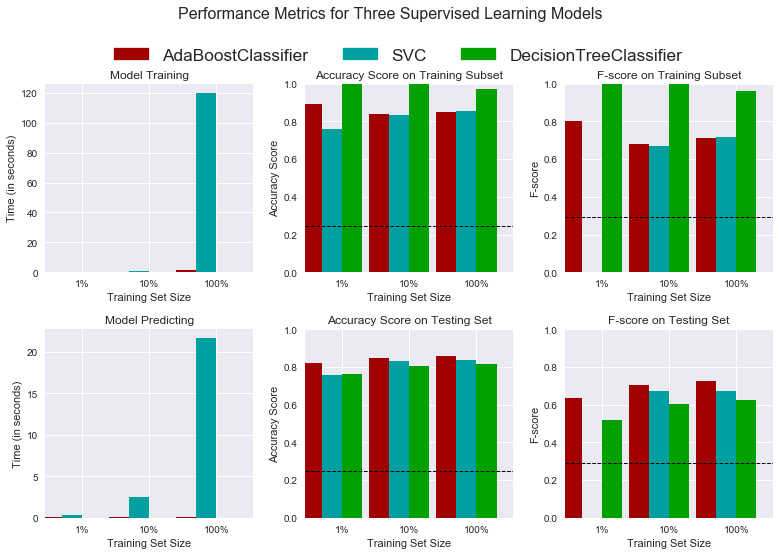

AdaBoostClassifier


,1% of train,10% of train,100% of train
acc_test,0.820674,0.849862,0.857601
acc_train,0.893333,0.840000,0.850000
f_test,0.632757,0.701882,0.724551
f_train,0.801282,0.680147,0.711538
pred_time,0.082000,0.084000,0.081000
train_time,0.104000,0.242000,1.716000


SVC


,1% of train,10% of train,100% of train
acc_test,0.756219,0.832615,0.837148
acc_train,0.760000,0.833333,0.853333
f_test,0.000000,0.671256,0.674477
f_train,0.000000,0.671296,0.719697
pred_time,0.293000,2.454000,21.663000
train_time,0.015000,1.157000,120.097000


DecisionTreeClassifier


,1% of train,10% of train,100% of train
acc_test,0.761968,0.807186,0.817910
acc_train,1.000000,0.996667,0.970000
f_test,0.519912,0.604957,0.626563
f_train,1.000000,0.997191,0.963855
pred_time,0.008000,0.007000,0.008000
train_time,0.007000,0.027000,0.412000


In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


clf_A = SVC(random_state = 1 )
clf_B = DecisionTreeClassifier(random_state = 1)
clf_C = AdaBoostClassifier(random_state = 1)


samples_100 = len(X_train)
samples_10 = len(X_train)/10
samples_1 = len(X_train)/100


results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


vs.evaluate(results, accuracy, fscore)

for i in results.items():
    print i[0]
    display(pd.DataFrame(i[1]).rename(columns={0:'1% of train', 1:'10% of train', 2:'100% of train'}))

## Improving Results

In [23]:
start = time()

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = AdaBoostClassifier(random_state = 1)


parameters = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.8, 1, 1.2, 1.5]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)


grid_fit = grid_obj.fit(X_train, y_train)


best_clf = grid_fit.best_estimator_


predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

end = time() 
print "\n\n------"
print 'Final RunTime', end - start, 'seconds'

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8645
Final F-score on the testing data: 0.7375


------
Final RunTime 116.898000002 seconds


### Final Model Evaluation


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.8576      |    0.8645       |
| F-score        |       0.7246      |    0.7375       |


## Feature Importance

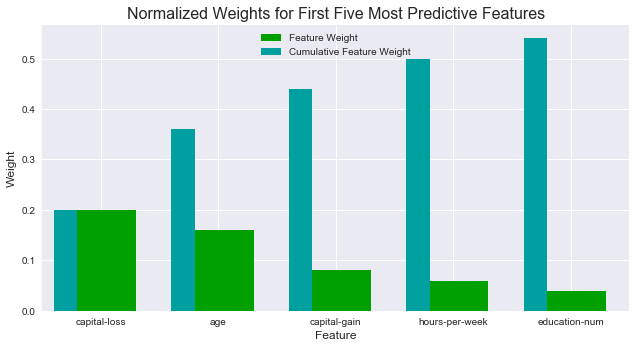

In [24]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 1)
model = clf.fit(X_train, y_train)


importances = model.feature_importances_

vs.feature_plot(importances, X_train, y_train)


### Feature Selection

In [25]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

clf = (clone(best_clf)).fit(X_train_reduced, y_train)

reduced_predictions = clf.predict(X_test_reduced)

print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8645
F-score on testing data: 0.7375

Final Model trained on reduced data
------
Accuracy on testing data: 0.8379
F-score on testing data: 0.6898


### Effects of Feature Selection

The final model trained on full data performs better than the five feature model which makes sense but the advantage of the five feature model is that it was very fast and the F-score and accuracy scores are still good; so I think f training time was an issue I would choose to train on the five most important features especially with large datasets
